In [1]:
#!nvidia-smi

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# Loading Libraries

In [2]:
#data management tools
import pandas as pd
import numpy as np
import imblearn

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sb
import re
import datetime

# #Vectorization and Tokenizing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer


# #DNN Modules
# import torch
# import tensorflow as tf
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import InputLayer
# from tensorflow.keras import losses
# from tensorflow.keras.regularizers import L2
# from tensorflow.keras.utils import plot_model
# from tensorflow.keras.layers import TextVectorization


# #Models
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import LinearRegression


# #Metrics and Testing
from sklearn.model_selection import train_test_split
from sklearn import metrics
# from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Dataloading and Preprocessing

In [3]:
#My Lenovo
#df1 = pd.read_csv('/Data/CERT/r4.2/logon.csv')
#df2 = pd.read_csv('/Data/CERT/r4.2/device.csv')
#df3 = pd.read_csv('/Data/CERT/r4.2/email.csv')
#df4 = pd.read_csv('/Data/CERT/r4.2/file.csv')
#df5 = pd.read_csv('/Data/CERT/r4.2/http.csv')
#df6 = pd.read_csv('/Data/CERT/r4.2/psychometric.csv')

#My MacBook
df1 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/logon.csv')
df2 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/device.csv')
df3 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/email.csv')
df4 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/file.csv')
df5 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/http.csv')
ans = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/answers/answers.csv')
ldap = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/ldap/2009-12.csv')
#df6 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/psychometric.csv')

#Google Drive - Colab
# df1 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/logon.csv')
# df2 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/device.csv')
# df3 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/http.csv')
# df4 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/email.csv')
# df5 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/file.csv')
# df6 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/psychometric.csv')

In [4]:
START = datetime.date(2010,1,1)
END = datetime.date(2010,7, 31)

In [5]:
df1['date'] = pd.to_datetime(df1['date'])
df2['date'] = pd.to_datetime(df2['date'])
df3['date'] = pd.to_datetime(df3['date'])
df4['date'] = pd.to_datetime(df4['date'])
df5['date'] = pd.to_datetime(df5['date'])

df1['day_date'] = pd.to_datetime(df1['date']).dt.date
df2['day_date'] = pd.to_datetime(df2['date']).dt.date
df3['day_date'] = pd.to_datetime(df3['date']).dt.date
df4['day_date'] = pd.to_datetime(df4['date']).dt.date
df5['day_date'] = pd.to_datetime(df5['date']).dt.date

In [6]:
df3['activity'] = "email"
df4['activity'] = "file"
df5['activity'] = "http"

In [7]:
df1_bs = df1[((df1['day_date'] >= START) & (df1['day_date'] <= END))]
df2_bs = df2[((df2['day_date'] >= START) & (df2['day_date'] <= END))]
df3_bs = df3[((df3['day_date'] >= START) & (df3['day_date'] <= END))]
df4_bs = df4[((df4['day_date'] >= START) & (df4['day_date'] <= END))]
df5_bs = df5[((df5['day_date'] >= START) & (df5['day_date'] <= END))]

# Stemming Lemmatizing Stopwords Lowercase and Tokenized

In [8]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
def prepare_text(pretext):

    # tokenize mission.
    tokens = word_tokenize(pretext, language="english", preserve_line=True)

    # Parts of speech (POS) tag tokens.
    token_tag = pos_tag(tokens)
    
    # Only include some of the POS tags.
    include_tags = ['VBN', 'VBD', 'JJ', 'JJS', 'JJR', 'CD', 'NN', 'NNS', 'NNP', 'NNPS']
    filtered_tokens = (tok for tok, tag in token_tag if tag in include_tags)    
    
    #stem words.
    #stemmed_tokens = (lancaster.stem(tok) for tok in filtered_tokens)

    #lemm words.
    #lemmed_words = (lemmatizer.lemmatize(tok) for tok in stemmed_tokens)

    #lower_words = [str.lower(tok) for tok in lemmed_words]
    lower_words = [str.lower(tok) for tok in filtered_tokens]

    #x = cv.fit_transform(tokens).toarray()

    joined = " ".join(lower_words)

    return(joined)

#ps = PorterStemmer()
#lancaster = LancasterStemmer()
#lemmatizer = nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ken.clements/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ken.clements/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ken.clements/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# df3_bs['df3tokenized'] = df3_bs['content'].apply(prepare_text)
# df4_bs['df4tokenized'] = df4_bs['content'].apply(prepare_text)
# df5_bs['df5tokenized'] = df5_bs['content'].apply(prepare_text)

# TFIDF

In [ ]:
# nltk.download('stopwords')
# stops = set(stopwords.words('english'))
# tfidfvectorizer = TfidfVectorizer(stop_words='english', analyzer='word' )

In [ ]:
# tfidf_df3 = tfidfvectorizer.fit_transform(df3_bs['df3tokenized'])
# df3_bs['df3tfidf_mean'] = ((tfidf_df3.sum(axis=1).transpose()) / (tfidf_df3.getnnz(axis=1))).transpose()
# df3_bs['df3tfidf_max'] = tfidf_df3.max()

In [ ]:
# tfidf_df4 = tfidfvectorizer.fit_transform(df4_bs['df4tokenized'])
# df4_bs['df4tfidf_mean'] = ((tfidf_df4.sum(axis=1).transpose()) / (tfidf_df4.getnnz(axis=1))).transpose()
# df4_bs['df4tfidf_max'] = tfidf_df4.max()

In [ ]:
# tfidf_df5 = tfidfvectorizer.fit_transform(df5_bs['df5tokenized'])
# df5_bs['df5tfidf_mean'] = ((tfidf_df5.sum(axis=1).transpose()) / (tfidf_df5.getnnz(axis=1))).transpose()
# df5_bs['df5tfidf_max'] = tfidf_df5.max()

# Aggregate all data

In [162]:
df_merged = pd.concat([df1_bs, df2_bs, df3_bs, df4_bs, df5_bs])

In [163]:
df_merged['label'] = 'normal'

In [164]:
df_merged.loc[df_merged['id'].isin(ans['id']),['label']] = 'bad'

In [165]:
dates = df_merged['day_date']
dates = dates.unique()

In [251]:
dfwow = []
for d in dates:
    dayevents = df_merged.loc[(df_merged['day_date'] == d)]
    users = dayevents['user']
    users = users.unique()
    for u in users:
        userd = dayevents[(dayevents['user'] == u)]
        date = d
        username = u
        login_count = userd[userd['activity'] == 'Logon'].shape[0]
        logout_count = userd[userd['activity'] == 'Logoff'].shape[0]
        email_count = userd[userd['activity'] == 'email'].shape[0]
        file_count = userd[userd['activity'] == 'file'].shape[0]
        http_count = userd[userd['activity'] == 'http'].shape[0]
        start_time = userd['date'].iloc[0]
        end_time = userd['date'].iloc[-1]
        tfidf3_mean = userd['df3tfidf_mean'].mean()
        tfidf4_mean = userd['df4tfidf_mean'].mean()
        tfidf5_mean = userd['df5tfidf_mean'].mean()
        if (userd[(userd['label'] == 'bad')].shape[0] > 0): label = 1
        else: label = 0
        dfwow.append([date, username, login_count, logout_count, email_count, file_count, http_count, start_time, end_time, label])


In [253]:
final = pd.DataFrame(dfwow, columns=['date', 'username', 'login_count', 'logout_count', 'email_count', 'file_count', 'http_count', 'start_time', 'end_time', 'label'])

In [285]:
final['start_secs'] = final['start_time'].apply(lambda s: (s - s.replace(hour=0, minute=0, second=0, microsecond=0)).seconds)
final['end_secs'] = final['end_time'].apply(lambda s: (s - s.replace(hour=0, minute=0, second=0, microsecond=0)).seconds)

In [286]:
users = final['username']
users = users.unique()

In [289]:
individual_deltas = []
for u in users:
    lastlogincount=0
    lastlogoutcount=0
    lastemailcount=0
    lastfilecount=0
    lasthttpcount=0
    laststartsecs=0
    lastendsecs=0
    userevents = final.loc[(final['username'] == u)]
    for index, row in userevents.iterrows():
        username = u
        date = row['date']
        individual_deltas.append([username, date, lastlogincount, lastlogoutcount, lastemailcount, lastfilecount, lasthttpcount, laststartsecs, lastendsecs])
        lastlogincount = row['login_count']
        lastlogoutcount = row['logout_count']
        lastemailcount = row['email_count']
        lastfilecount = row['file_count']
        lasthttpcount = row['http_count']
        laststartsecs = row['start_secs']
        lastendsecs = row['end_secs']

In [290]:
individual_deltas_df = pd.DataFrame(individual_deltas, columns=['username', 'date', 'lastlogincount', 'lastlogoutcount', 'lastemailcount', 'lastfilecount', 'lasthttpcount', 'laststartsecs', 'lastendsecs'])

In [291]:
final_individual_deltas_join_df = pd.merge(final, individual_deltas_df, on=['username', 'date'], how='left')

In [292]:
ldap = ldap.rename(columns={'user_id': 'username'})

In [293]:
joined_df = pd.merge(final_individual_deltas_join_df, ldap, on='username', how='left')

In [294]:
label_encoder = LabelEncoder()

In [295]:
joined_df['username'] = label_encoder.fit_transform(joined_df['username'])
joined_df['department'] = label_encoder.fit_transform(joined_df['department'])

In [296]:
depts = joined_df['department']
depts = depts.unique()

In [297]:
dept_means = []
for d in depts:
    dept_events = joined_df.loc[(joined_df['department'] == d)]
    department = d
    login_mean = dept_events['login_count'].mean()
    logout_mean = dept_events['logout_count'].mean()
    http_mean = dept_events['http_count'].mean()
    file_mean = dept_events['file_count'].mean()
    email_mean = dept_events['logout_count'].mean()
    start_mean = dept_events['start_secs'].mean()
    end_mean = dept_events['end_secs'].mean()
    dept_means.append([department, login_mean, logout_mean, email_mean, file_mean, http_mean, start_mean, end_mean])

In [298]:
dept_events_df = pd.DataFrame(dept_means, columns=['department', 'login_mean', 'logout_mean', 'email_mean', 'file_mean', 'http_mean', 'start_mean', 'end_mean'])


In [299]:
last_joined_df = pd.merge(joined_df, dept_events_df, on='department', how='left')

In [300]:
last_joined_df['login_delta'] = (last_joined_df['login_count'] - last_joined_df['login_mean'])
last_joined_df['logout_delta'] = (last_joined_df['logout_count'] - last_joined_df['logout_mean'])
last_joined_df['email_delta'] = (last_joined_df['email_count'] - last_joined_df['email_mean'])
last_joined_df['file_delta'] = (last_joined_df['file_count'] - last_joined_df['file_mean'])
last_joined_df['http_delta'] = (last_joined_df['http_count'] - last_joined_df['http_mean'])
last_joined_df['start_delta'] = (last_joined_df['start_secs'] - last_joined_df['start_mean'])
last_joined_df['end_delta'] = (last_joined_df['end_secs'] - last_joined_df['end_mean'])

In [305]:
last_joined_df['ind_login_delta'] = (last_joined_df['login_count'] - last_joined_df['lastlogincount'])
last_joined_df['ind_logout_delta'] = (last_joined_df['logout_count'] - last_joined_df['lastlogoutcount'])
last_joined_df['ind_email_delta'] = (last_joined_df['email_count'] - last_joined_df['lastemailcount'])
last_joined_df['ind_file_delta'] = (last_joined_df['login_count'] - last_joined_df['lastfilecount'])
last_joined_df['ind_http_delta'] = (last_joined_df['login_count'] - last_joined_df['lasthttpcount'])
last_joined_df['ind_start_secs_delta'] = (last_joined_df['start_secs'] - last_joined_df['laststartsecs'])
last_joined_df['ind_end_secs_delta'] = (last_joined_df['end_secs'] - last_joined_df['lastendsecs'])


In [354]:
indexFirstDay = last_joined_df[ (last_joined_df['date'] == '2010-01-02')  ].index

In [391]:
users = last_joined_df['username']
users = users.unique()

In [397]:
for u in users:
    userIndex = last_joined_df[(last_joined_df['username'] == u)].first_valid_index()
    last_joined_df.drop(userIndex , inplace=True)

In [170]:
#final = final.dropna(subset=['tfidf5_mean', 'tfidf3_mean', 'tfidf4_mean'])

In [171]:
#final['date'] = (final['date'] - final['date'].min())  / np.timedelta64(1,'D')


# Sampling Methods

<Axes: xlabel='label', ylabel='count'>

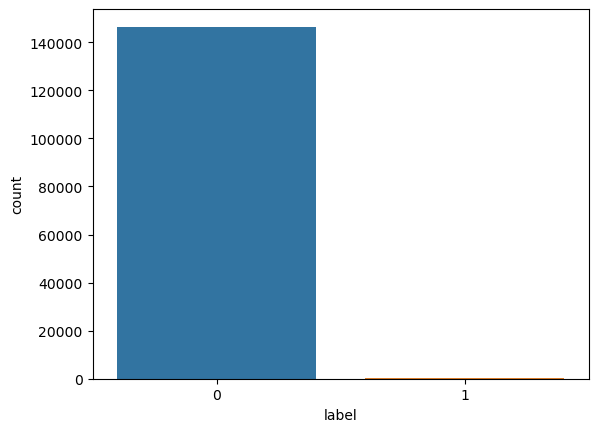

In [398]:
sb.countplot(data=last_joined_df, x='label')

In [399]:
last_joined_df.columns

Index(['date', 'username', 'login_count', 'logout_count', 'email_count',
       'file_count', 'http_count', 'start_time', 'end_time', 'label',
       'start_secs', 'end_secs', 'lastlogincount', 'lastlogoutcount',
       'lastemailcount', 'lastfilecount', 'lasthttpcount', 'laststartsecs',
       'lastendsecs', 'employee_name', 'email', 'role', 'business_unit',
       'functional_unit', 'department', 'team', 'supervisor', 'login_mean',
       'logout_mean', 'email_mean', 'file_mean', 'http_mean', 'start_mean',
       'end_mean', 'login_delta', 'logout_delta', 'email_delta', 'file_delta',
       'http_delta', 'start_delta', 'end_delta', 'ind_login_delta',
       'ind_logout_delta', 'ind_email_delta', 'ind_file_delta',
       'ind_http_delta', 'ind_start_secs_delta', 'ind_end_secs_delta'],
      dtype='object')

In [400]:
X = last_joined_df.loc[:, ['login_delta', 'logout_delta', 'email_delta', 'file_delta',
       'http_delta', 'start_delta', 'end_delta', 'ind_login_delta',
       'ind_logout_delta', 'ind_email_delta', 'ind_file_delta',
       'ind_http_delta', 'ind_start_secs_delta', 'ind_end_secs_delta']]

In [401]:
df_z_scaled = X.copy()
  
# apply normalization techniques
for column in df_z_scaled.columns:
    df_z_scaled[column] = (df_z_scaled[column] - df_z_scaled[column].mean()) / df_z_scaled[column].std()    

,login_delta,logout_delta,email_delta,file_delta,http_delta,start_delta,end_delta,ind_login_delta,ind_logout_delta,ind_email_delta,ind_file_delta,ind_http_delta,ind_start_secs_delta,ind_end_secs_delta
53,1.009379,-0.128285,-0.929160,-0.281929,-0.199089,-1.291877,-0.094758,-0.000636,-0.000013,-0.000252,0.414560,1.010684,0.015583,-0.483773
54,0.874122,-0.118106,0.225925,0.490444,-0.187235,-0.846636,-1.450517,-1.728985,-1.972219,-0.000252,0.414560,-0.149203,0.268173,-0.029705
55,1.009379,-0.128285,-0.929160,-0.281929,-0.199089,-1.141970,-2.629381,1.727713,-0.000013,-0.000252,0.414560,1.010684,0.268173,-0.813265
56,1.009379,-0.128285,-0.929160,-0.281929,-0.289483,-1.141970,-0.270670,-1.728985,-1.972219,-0.000252,-0.448444,1.045832,0.252386,-0.484490
61,0.985405,-0.134398,1.570762,1.653389,-0.329153,-0.084821,0.549665,-0.000636,-0.000013,-0.000252,0.414560,-1.168497,0.205026,-0.310658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147661,0.874122,-0.118106,0.225925,-0.368256,-0.187235,0.769028,0.334621,-0.000636,-0.000013,-0.000252,0.414560,-0.149203,-0.142286,-0.201385
147662,-0.593819,-0.118106,0.995317,-0.368256,1.982235,0.785684,-0.163178,-1.728985,-0.000013,4.037362,0.198809,-1.010331,-0.079138,3.018457
147663,-0.376862,-0.103752,-1.503797,-0.164015,-0.081324,0.870454,-0.573936,-1.728985,-0.000013,-0.577054,0.198809,1.327016,-0.015991,-1.145388
147664,-0.458561,-0.128285,-1.121508,-0.281929,-0.199089,0.507007,-1.211553,-0.000636,-0.000013,-0.577054,0.198809,0.993110,0.094518,-0.423518


In [402]:
X = df_z_scaled 

In [403]:
y = last_joined_df['label']

In [404]:
final_undersample = RandomUnderSampler(sampling_strategy='majority')
X_final_under, y_final_under = final_undersample.fit_resample(X, y)

In [405]:
final_oversample = RandomOverSampler(sampling_strategy='minority')
X_final_over, y_final_over = final_oversample.fit_resample(X, y)

In [406]:
final_smote = SMOTE(k_neighbors=5)
X_final_smote, y_final_smote = final_smote.fit_resample(X, y)

In [407]:
final_blsmote = BorderlineSMOTE()
X_final_blsmote, y_final_blsmote = final_blsmote.fit_resample(X, y)

In [408]:
final_adasyn = ADASYN()
X_final_adasyn, y_final_adasyn = final_adasyn.fit_resample(X, y)

In [409]:
final_under = X_final_under.copy()
final_over = X_final_over.copy()
final_smote = X_final_smote.copy()
final_blsmote = X_final_blsmote.copy()
final_adasyn = X_final_adasyn.copy()

In [410]:
final_under['label'] = y_final_under
final_over['label'] = y_final_over
final_smote['label'] = y_final_smote
final_blsmote['label'] = y_final_blsmote
final_adasyn['label'] = y_final_adasyn

<Axes: xlabel='label', ylabel='ind_end_secs_delta'>

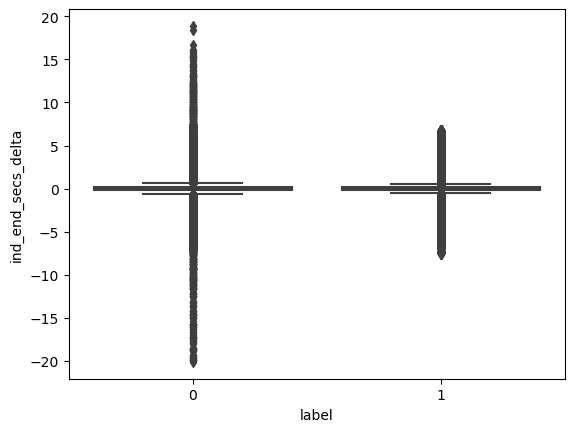

In [411]:
sb.boxplot(data=final_adasyn, x="label", y='ind_end_secs_delta')

In [412]:
mean0 = final_adasyn[final_adasyn['label'] == 0].sample(30)
mean1 = final_adasyn[final_adasyn['label'] == 1].sample(30)
fvalue, pvalue = stats.ttest_ind(mean0['ind_end_secs_delta'], mean1['ind_end_secs_delta'])
print(fvalue, pvalue)

1.4455424001862525 0.15368748822981154


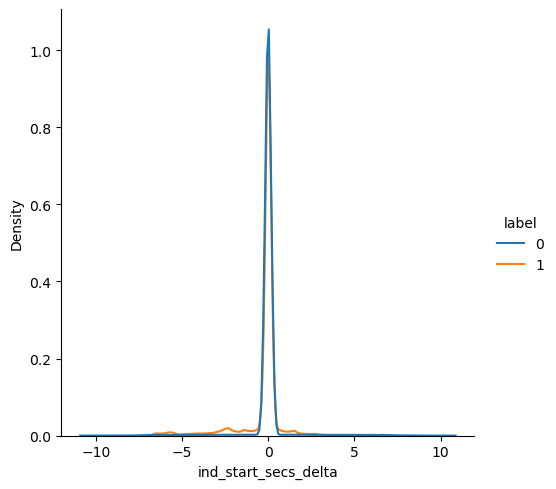

In [413]:
sb.displot(data=final_adasyn, x="ind_start_secs_delta", hue="label", kind='kde')

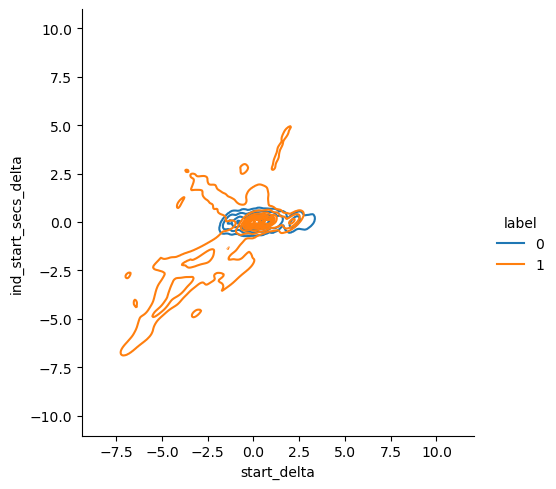

In [414]:
sb.displot(data=final_adasyn, x="start_delta", y='ind_start_secs_delta', hue="label", kind='kde')

In [415]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train,y_train)
predicted = classifier.predict(X_test)

print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
#print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))

Logistic Regression Accuracy: 0.9986818181818182
Logistic Regression Recall: 0.0


In [416]:
cf_matrix = metrics.confusion_matrix(y_test,predicted)
print(cf_matrix)

[[43942     0]
 [   58     0]]


In [417]:
raw_predicted = classifier.predict(X)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y, raw_predicted))
print("Logistic Regression Recall:",metrics.recall_score(y, raw_predicted))
cf_matrix = metrics.confusion_matrix(y, raw_predicted)
print(cf_matrix)


Logistic Regression Accuracy: 0.9986227210123683
Logistic Regression Recall: 0.0
[[146464      0]
 [   202      0]]


In [418]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_final_under, y_final_under, test_size=0.3)

In [419]:
classifier_under = LogisticRegression(max_iter=1000)

classifier_under.fit(X_train_under, y_train_under)

predicted_under = classifier_under.predict(X_test_under)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test_under, predicted_under))
#print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test_under, predicted_under))

Logistic Regression Accuracy: 0.680327868852459
Logistic Regression Recall: 0.7843137254901961


In [420]:
cf_matrix = metrics.confusion_matrix(y_test_under,predicted_under)
print(cf_matrix)

[[43 28]
 [11 40]]


In [421]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_final_over, y_final_over, test_size=0.3)

classifier_over = LogisticRegression(max_iter=1000)

classifier_over.fit(X_train_over, y_train_over)

predicted_over = classifier_over.predict(X_test_over)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test_over, predicted_over))
#print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test_over, predicted_over))

Logistic Regression Accuracy: 0.6798666348046746
Logistic Regression Recall: 0.7457592385983287


In [422]:
cf_matrix = metrics.confusion_matrix(y_test_over,predicted_over)
print(cf_matrix)

[[26993 16967]
 [11166 32753]]


# SMOTE Analysis with Logistic Regression

In [423]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_final_smote, y_final_smote, test_size=0.3)

In [424]:
classifier_smote = LogisticRegression(max_iter=1000)

classifier_smote.fit(X_train_smote, y_train_smote)

predicted_smote = classifier_smote.predict(X_test_smote)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test_smote, predicted_smote))
#print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test_smote, predicted_smote))

cf_matrix = metrics.confusion_matrix(y_test_smote,predicted_smote)
print(cf_matrix)


Logistic Regression Accuracy: 0.6815166308219256
Logistic Regression Recall: 0.7437492877492877
[[27259 16745]
 [11243 32632]]


In [425]:
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_final_adasyn, y_final_adasyn, test_size=0.3)

In [426]:
classifier_adasyn = LogisticRegression(max_iter=1000)

classifier_adasyn.fit(X_train_adasyn, y_train_adasyn)

predicted_adasyn = classifier_adasyn.predict(X_test_adasyn)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test_adasyn, predicted_adasyn))
#print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test_adasyn, predicted_adasyn))

cf_matrix = metrics.confusion_matrix(y_test_adasyn,predicted_adasyn)
print(cf_matrix)

Logistic Regression Accuracy: 0.6679033139111434
Logistic Regression Recall: 0.7176403468735737
[[27243 16809]
 [12373 31447]]


In [427]:
X_train_blsmote, X_test_blsmote, y_train_blsmote, y_test_blsmote = train_test_split(X_final_blsmote, y_final_blsmote, test_size=0.3)

In [428]:
classifier_blsmote = LogisticRegression(max_iter=1000)

classifier_blsmote.fit(X_train_blsmote, y_train_blsmote)

predicted_blsmote = classifier_blsmote.predict(X_test_blsmote)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test_blsmote, predicted_blsmote))
#print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test_blsmote, predicted_blsmote))

cf_matrix = metrics.confusion_matrix(y_test_blsmote,predicted_blsmote)
print(cf_matrix)

Logistic Regression Accuracy: 0.7501450858566893
Logistic Regression Recall: 0.8353067568803145
[[29379 14752]
 [ 7205 36543]]


In [429]:
main_predicted = classifier_blsmote.predict(X)

In [430]:
print("Logistic Regression Accuracy:",metrics.accuracy_score(y, main_predicted))
print("Logistic Regression Recall:",metrics.recall_score(y, main_predicted))
cf_matrix = metrics.confusion_matrix(y,main_predicted)
print(cf_matrix)

Logistic Regression Accuracy: 0.6650621139186996
Logistic Regression Recall: 0.698019801980198
[[97401 49063]
 [   61   141]]


In [189]:
#df_person = final.loc[(final['username'] == 'JJM0203')]

In [190]:
#df_badusers = final.loc[(final['label'] == 1)]

In [191]:
#df_badusers

In [192]:
# X = df_person[['login_count', 'logout_count', 'email_count', 'file_count', 'http_count']].copy()
# y = df_person['label']

In [194]:
#X = np.array(X).reshape(len(X), 1)

In [196]:
cf_matrix = metrics.confusion_matrix(y_test,predicted)